Оцінювання даної роботи буде ураховувати якість ваших візуалізацій (вони можуть незначно відрізнятися від прикладів, але повинні змістовно відображати суть задачі) та опис отриманих вами результатів. При наявності ЛИШЕ візуалізацій без роз'яснень, завдання буде оцінена максимум у половину балів.

Під час виконання вам дозволено користуватися будь-якими зручними для вас Python бібліотеками для візуалізації.

# I. Receiving Data.

In [1]:
# cell for imports. All imports must go here.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

1. (2б) Для виконання цієї лабораторної роботи Вам необхідно скористатися вибіркою titanic ([train.csv](https://www.kaggle.com/c/titanic/data?select=train.csv)). Зчитайте його та збережіть його у змінну, щоб у подальшому її використати для візуалізацій. Виведіть інформацію про кожну колонку, її індекс, тип та кількість непропущених значень та перші кілька рядків датафрейму.


In [2]:
titanic_df = pd.read_csv("/train.csv")

In [3]:
print("Information about columns:")
print(titanic_df.info())
print("\nFirst rows:")
titanic_df.head(10)

Information about columns:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

First rows:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


# IІ. Data Visualization.

2. (10б) Створіть pie chart, який би показував співвідношення виживших до загиблих.

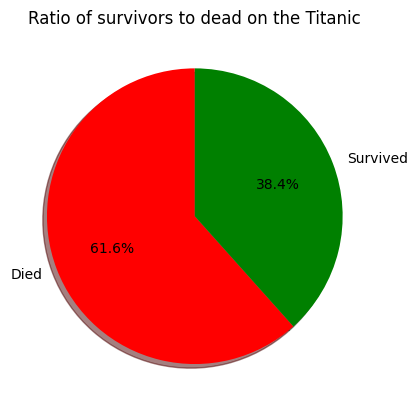

In [4]:
survived_people = titanic_df["Survived"].value_counts()
fig1, ax1 = plt.subplots()

ax1.pie(survived_people, labels=["Died", "Survived"], autopct='%1.1f%%',
        shadow=True, startangle=90, colors=["red", "green"])

plt.title("Ratio of survivors to dead on the Titanic")
plt.show()

З графіку бачимо, що більше 3\5 людей не пережили катастрофу на титаніку

3. (20б) Створіть bar chart, який би показував співвідношення загиблих до виживших для кожної статі. Для groupby використовуйте атрибут as_index=False.


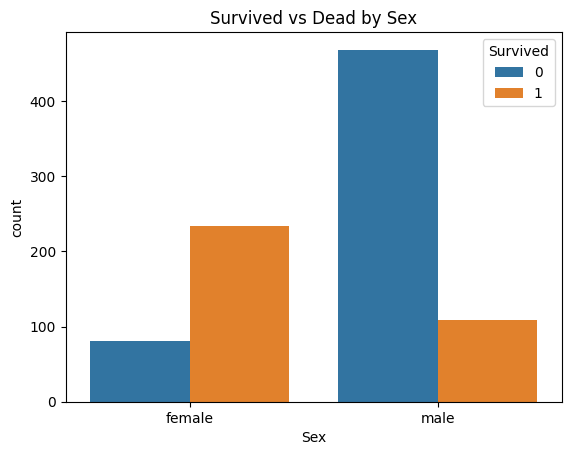

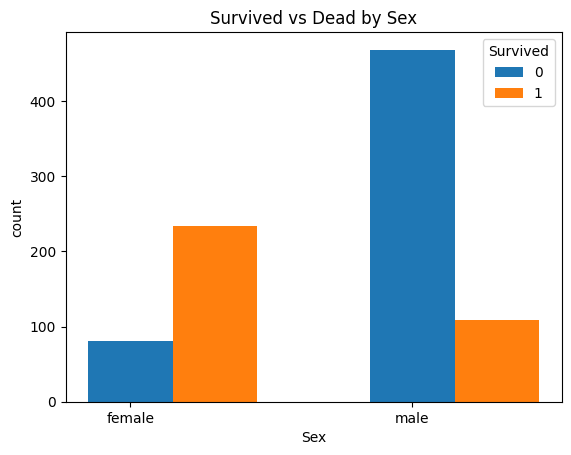

In [5]:
survived_by_sex = titanic_df.groupby(["Sex", "Survived"], as_index=False).size()

survived_people = survived_by_sex[survived_by_sex["Survived"] == 1]
dead_people = survived_by_sex[survived_by_sex["Survived"] == 0]


fig2, ax2 = plt.subplots()

survived_xpos = np.arange(len(survived_people["Sex"]))+0.3

plt.bar(dead_people["Sex"], dead_people["size"], width=0.3,
        color="tab:blue", label="0")

plt.bar(survived_xpos, survived_people["size"], width=0.3,
        color="tab:orange", label="1")

plt.xlabel("Sex")
plt.ylabel("count")

ax2.set_title("Survived vs Dead by Sex")
ax2.legend(title="Survived")
plt.show()

Можна побачити, що більше 400 чоловіків загинуло й вижило лише трохи більше 100, в той час жінок вижило більше(>200), ніж загинуло(<100).

4. (20б) Відобразіть кількість пропущених значень в датасеті по кожній із змінних.

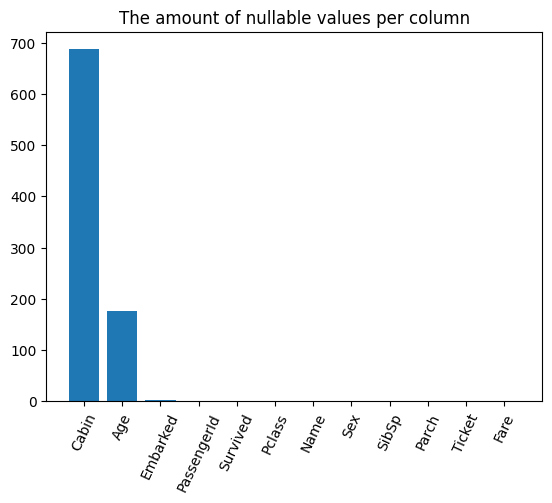

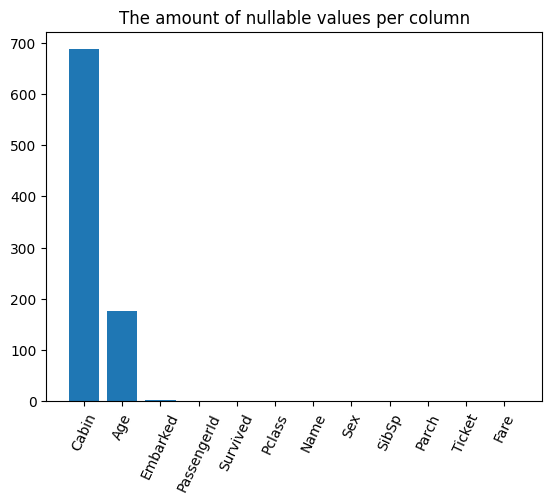

In [6]:
null_counts = titanic_df.isnull().sum().sort_values(ascending=False)
fig3, ax3 = plt.subplots()
plt.bar(null_counts.index, null_counts.values, color="tab:blue")
plt.title("The amount of nullable values per column")
plt.xticks(rotation=65)
plt.show()

Найбільше нульових значень (майже 700) має номер кабінки пасажира. Також присутні нульові значення у віку (до 200) та трохи про порт посадки. У всіх колноках інших немає нульових значень

5. (10б) Побудуйте наступний графік, дайте йому назву та опишіть, що власне на них відображається.

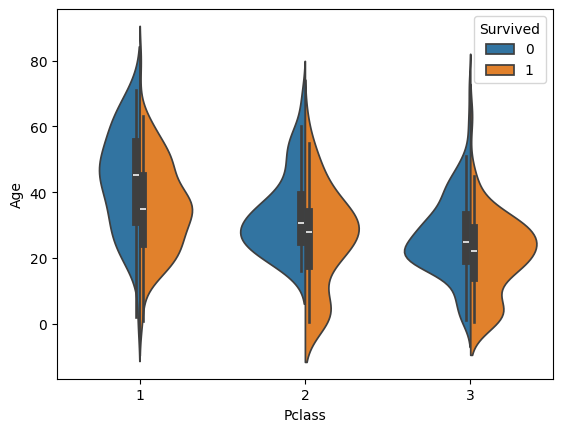

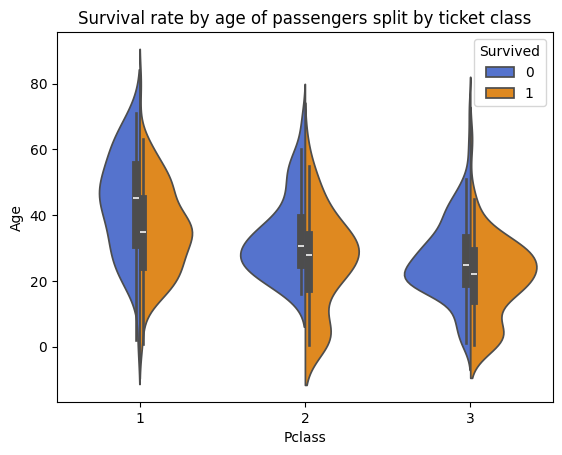

In [7]:
sns.violinplot(data=titanic_df, x="Pclass", y="Age", hue="Survived",
               split=True,palette={0: "royalblue", 1: "darkorange"})
plt.title("Survival rate by age of passengers split by ticket class")
plt.show()

На графіку відображається відношення загинувших та виживших людей в залежності від віку, розподілені по класу квитка. Найбільше загинувших людей серед першого класу - між 40 та 50 років, виживших - між 30 та 40. Серед другого класу: виживших - між 40 та 30, загинувших - між 20 - 40. Серед третього: найбільше виживших - від 20 до 30 років, загинувших - приблизно 20 років.

6. (13б) Побудуйте графік розподілу частот по віку пасажирів.


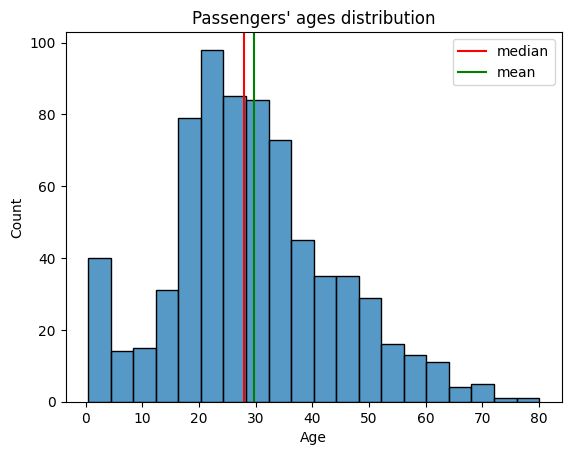

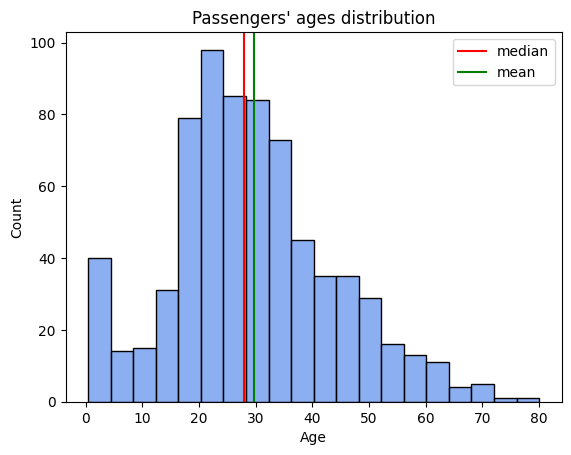

In [8]:
sns.histplot(data=titanic_df, x="Age", bins=20, color="cornflowerblue")
plt.title("Passengers' ages distribution")
plt.xlabel("Age")
plt.ylabel("Count")

median_age = titanic_df["Age"].median()
mean_age = titanic_df["Age"].mean()

plt.axvline(median_age, color="red", ls="-", label="median")
plt.axvline(mean_age, color="green", ls="-", label="mean")
plt.legend()
plt.show()

Найбільше пасажирів було віком від 20 до 25, середній вік пасажирів ≈ 30 років, найменше людей віком 70 - 80 років. Медіана дорівнює ≈ 28 років, тому пасажирів 0-28 років було стількі ж, скільки пасажирів 28-80 років.

7. (25б) Поставте бізнес-питання до даних. Дайте на нього відповідь за допомогою візуалізацій. Прокоментуйте отриману відповідь.

Люди, якого віку, заплатила найбільше за квитки?

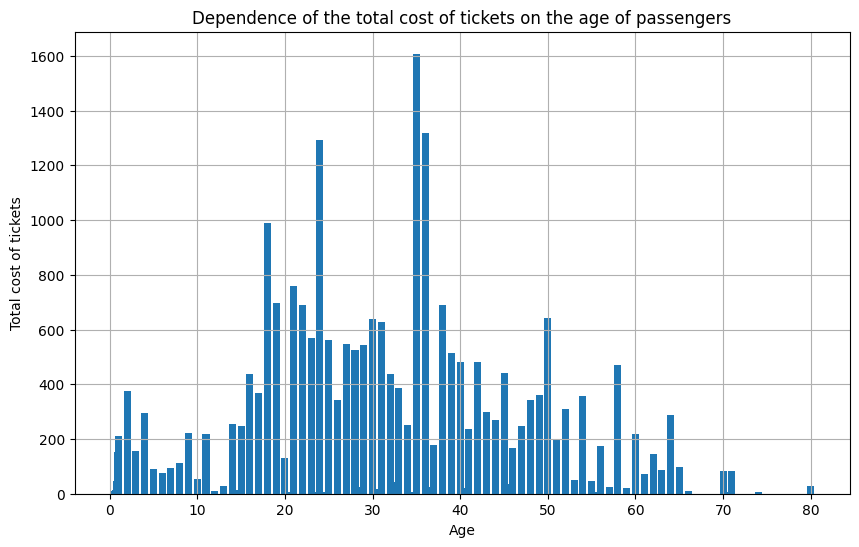

In [9]:
age_fare_total = titanic_df.groupby("Age")["Fare"].sum().reset_index()
plt.figure(figsize=(10, 6))

plt.bar(age_fare_total['Age'], age_fare_total['Fare'])
plt.title("Dependence of the total cost of tickets on the age of passengers")
plt.xlabel("Age")
plt.ylabel("Total cost of tickets")
plt.grid(True)
plt.show()

Найбільше за квитки заплатили люди віком 35-36, 24 років. Якщо орієнтуватися на категорію людей, яка є найвигіднішою, то це люди від 18 до 50 років. Й скоріш за все людям, яким < 18, квитки купили батьки. На основі цієї діаграми, можна аналізувати далі, розбивати за категоріями й т.д.

# Вітаю! Ви велика(ий) молодець, що впоралась(вся). Похваліть себе та побалуйте чимось приємним. Я Вами пишаюся.

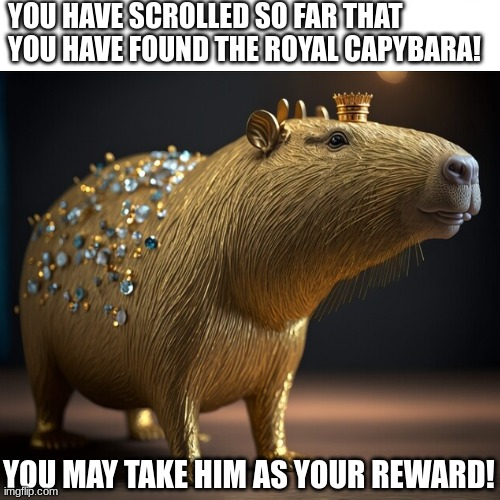